In [1]:
import numpy as np

from magtense.magstatics import Tiles, run_simulation
from magtense.utils import create_plot, validation

### Adding magnetic tiles to simulation
Available types: 1 = cylinder, 2 = prism, 3 = circ_piece, 4 = circ_piece_inv, 5 = tetrahedron, 6 = sphere, 7 = spheroid, 10 = ellipsoid

In [2]:
mu0 = 4 * np.pi * 1e-7
tiles = Tiles(
    n=6,
    M_rem=1.2 / mu0,
    tile_type=[2, 1, 3, 4, 5, 7],
    color=[[1, 0, 0], [0, 0, 1], [1, 0.5, 0], [0.3, 0.8, 0.2], [0, 0, 0], [1, 0, 1]]
)

#### Moving and scaling the indivdual tiles

In [3]:
# 0: Prism
tiles.size = ([0.1, 0.3, 0.2], 0)
tiles.offset = ([0.1, 0.2, 0.1], 0)

# 1: Cylindrical Tiles
tiles.center_pos = ([1, 0, 0.3], 1) 
tiles.dev_center = ([0.15, np.pi/9, 0.3], 1)

# 2: Circpiece
tiles.center_pos = ([0.85, np.pi/5, 1.2], 2) 
tiles.dev_center = ([0.15, np.pi/7, 0.25], 2)

# 3: Inverted Circpiece
tiles.center_pos = ([0.2, np.pi/6, 0.75], 3) 
tiles.dev_center = ([0.05, np.pi/4, 0.4], 3)

# 4: Tetrahedron
tiles.vertices = (np.array([[0.65, 0.9, 0.5], [0.8, 0.9, 0.7], [0.85, 0.55, 0.25], [0.95, 0.85, 0.15]]), 4)

# 5: Prolate Spheroid
tiles.size = ([0.1, 0.3, 0.1], 5)
tiles.offset = ([0.1, 0.6, 0.7], 5)
tiles.rot = ([0, 0, 2], 5)

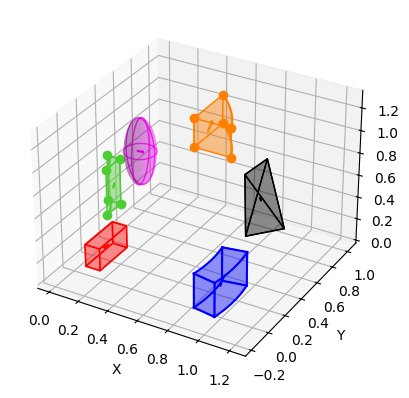

In [4]:
# Visualisation of the 6 magnetic tiles
create_plot(tiles, [None])

### Adding evaluation points

In [5]:
n_points = [1, 100, 80]
seg = [0.9, 1, 0.8] / np.asarray(n_points)
pts = [[(i + 0.5) * seg[0], (j + 0.5) * seg[1], (k + 0.5) * seg[2]]
        for i in range(0, n_points[0])
        for j in range(0, n_points[1])
        for k in range(0, n_points[2])]
pts = np.asarray(pts, dtype=np.float64, order='F')

### Run MagTense

In [6]:
updated_tiles, H_demag = run_simulation(tiles, pts)

#### Visualization of solution

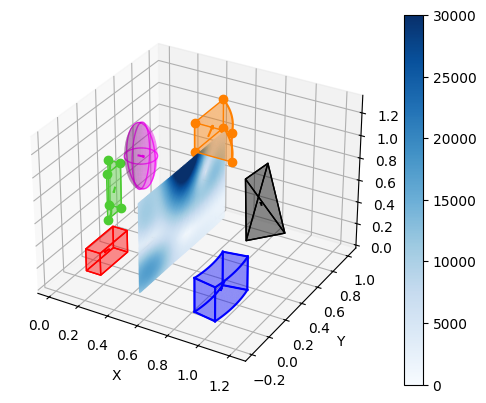

In [7]:
create_plot(updated_tiles, pts, H_demag)

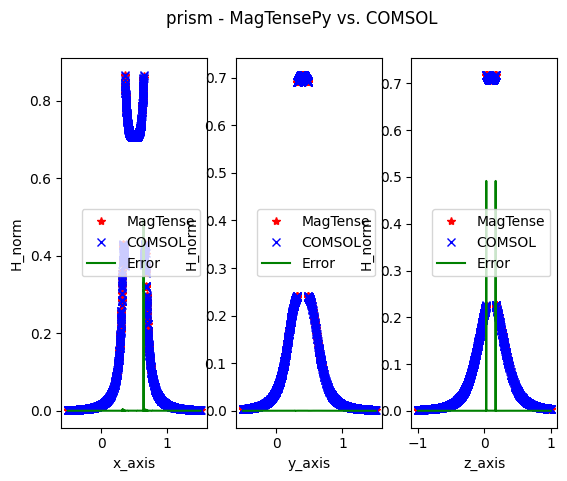

In [8]:
tile_val = Tiles(
    n=1,
    size=[0.6, 0.1, 0.3],
    offset=[0.5, 0.4, 0.1],
    rot=[np.pi/2, -np.pi/3, np.pi/4],
    tile_type=2,
    M_rem=1.2/mu0,
    easy_axis=[0.35355339, 0.61237244, 0.70710678],
    color=[1, 0, 0]
)
validation('prism', tile_val, [0.5, 0.4, 0.1], plot_error=True)